# 07.04 - TENSORFLOW

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from local.lib import mlutils
from IPython.display import Image

try:
    %tensorflow_version 2.x
    print ("Using TF2 in Google Colab")
except:
    pass

import tensorflow as tf
%matplotlib inline

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Using TF2 in Google Colab


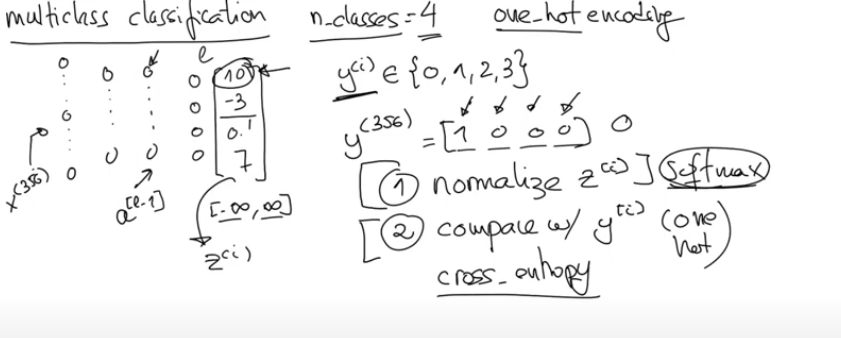

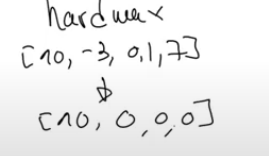

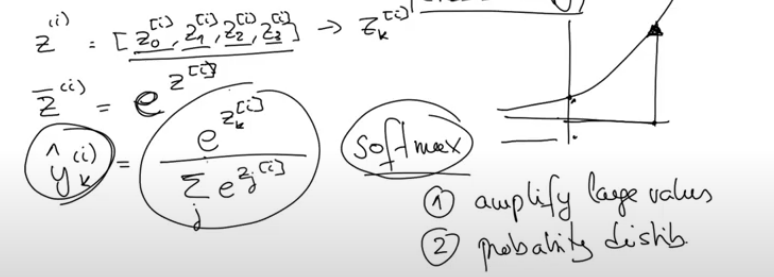

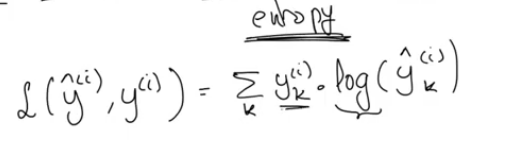

## A dataset (again)

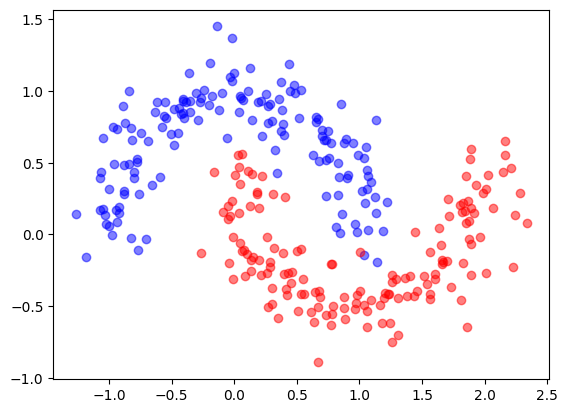

In [3]:
## KEEPOUTPUT
from sklearn.datasets import make_moons
X,y = make_moons(300, noise=.15)
plt.scatter(X[:,0][y==0], X[:,1][y==0], color="blue", label="class 0", alpha=.5)
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="red", label="class 1", alpha=.5)

In [4]:
y

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

## A neural network in tensorflow, 4 neurons in the hidden layer, 1 output

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='tanh'), #necesitamos 4 neuronas en la capa intermedia con activación tanh
    tf.keras.layers.Dense(1, activation='sigmoid') #1 neurona en la capa de salida con activación sigmoide
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [6]:
## KEEPOUTPUT
model.fit(X,y, epochs=10, batch_size=1)

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.4097 - accuracy: 0.7933
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3622 - accuracy: 0.8667
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3400 - accuracy: 0.8733
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2331 - accuracy: 0.9033
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.1522 - accuracy: 0.9467
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.1184 - accuracy: 0.9667
Epoch 7/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0780 - accuracy: 0.9767
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1103 - accuracy: 0.9667
Epoch 9/10
300/300 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9700
Epoch 10/10
300/300 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9700

1250/1250 [==============================] - 2s 1ms/step


(0.503075, 0.496925)

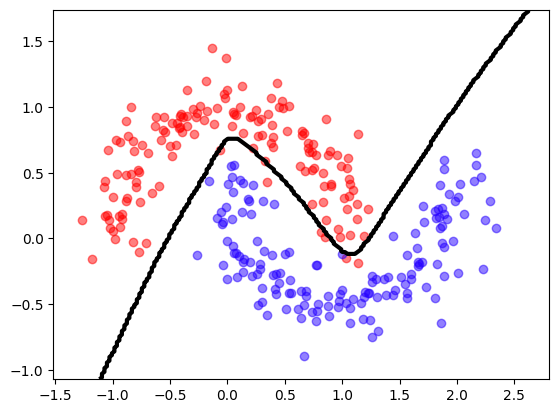

In [7]:
## KEEPOUTPUT
predict = lambda X: (model.predict(X)[:,0]>.5).astype(int)
mlutils.plot_2Ddata_with_boundary(predict, X, y)

## A bigger network

- different activation functions
- different optimizer

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [9]:
## KEEPOUTPUT
model.fit(X,y, epochs=10, batch_size=1)

Epoch 1/10
300/300 [==============================] - 1s 1ms/step - loss: 0.3067 - accuracy: 0.8567
Epoch 2/10
300/300 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8733
Epoch 3/10
300/300 [==============================] - 0s 1ms/step - loss: 0.2383 - accuracy: 0.9100
Epoch 4/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1863 - accuracy: 0.9200
Epoch 5/10
300/300 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9633
Epoch 6/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9700
Epoch 7/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9633
Epoch 8/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1437 - accuracy: 0.9533
Epoch 9/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9633
Epoch 10/10
300/300 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9800

1250/1250 [==============================] - 1s 813us/step


(0.546925, 0.453075)

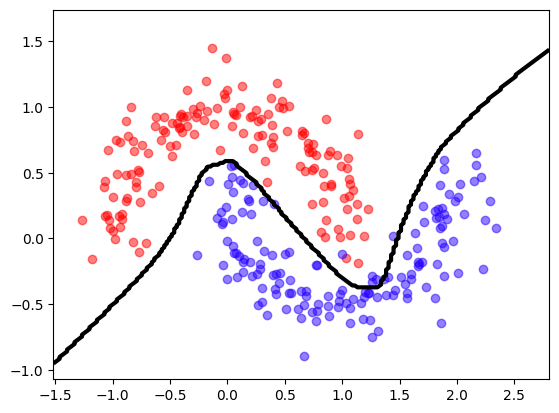

In [10]:
## KEEPOUTPUT
predict = lambda X: (model.predict(X)[:,0]>.5).astype(int)
mlutils.plot_2Ddata_with_boundary(predict, X, y)

## Cross entropy - multiclass classification

follow [THIS EXAMPLE](https://www.tensorflow.org/tutorials/keras/classification) in TensorFlow doc site. Observe that:

- labels corresponding to a 10-class classification problem
- the network contains 10 output neurons, one per output class
- the loss function is `SparseCategoricalCrossEntropy`

Observe how **cross entropy** works with 4 classes:

- first we convert the output to a one-hot encoding
- we create a network with two output neurons with sigmoid activation
- interpret each neuron's output as elements of a probability distribution
- normalize the probability distribution (must add up to one)
- we consider network output is better when it yields more probability to the correct class

**expected classes for five data points**

In [11]:
## KEEPOUTPUT
y = np.random.randint(4, size=5)
y

array([2, 2, 0, 1, 3])

**convert it to one hot encoding**

In [12]:
## KEEPOUTPUT
y_ohe = np.eye(4)[y].astype(int) #eye crea una matriz identidad
y_ohe

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

**simulate some neural network output with NO ACTIVATION function**

with 10 output neurons, so for each input element (we have five) we have 4 outputs.

this is called **LOGITS** in Tensorflow

In [13]:
## KEEPOUTPUT
y_hat = np.round(np.random.normal(size=y_ohe.shape), 2)
y_hat

array([[ 0.09, -1.15,  1.81,  1.3 ],
       [-0.14, -0.44, -0.43, -1.79],
       [-0.38,  0.02, -0.13,  0.51],
       [ 0.86, -1.26, -1.  ,  0.51],
       [-1.05,  1.33, -0.91, -0.84]])

**normalize LOGITS**. This is the **SOFTMAX function**

**LOGITS**  obtained from network last layer with no activation

$$\hat{\mathbf{y}}^{(i)} = [\hat{y}^{(i)}_0, \hat{y}^{(i)}_1,...,\hat{y}^{(i)}_9]$$

**SOFTMAX ACTIVATION**

$$\hat{\bar{\mathbf{y}}}^{(i)} = [\hat{\bar{y}}^{(i)}_0, \hat{\bar{y}}^{(i)}_1,...,\hat{\bar{y}}^{(i)}_9]$$

with 

$$\hat{\bar{y}}^{(i)}_k = \frac{e^{\hat{y}^{(i)}_k}}{\sum_{j=0}^9e^{\hat{y}^{(i)}_j}}$$


this ensures:

- $\sum_{k=0}^9 \hat{\bar{y}}^{(i)}_k=1$
- $0 \le \hat{\bar{y}}^{(i)}_k \le 1$

this way, for each input we have a nice probability distribution in its outputs.

This is implemented in **Tensorflow**

In [14]:
## KEEPOUTPUT
y_hatb = tf.nn.softmax(y_hat).numpy()
y_hatb

array([[0.09777659, 0.028295  , 0.54603613, 0.32789228],
       [0.37297683, 0.27630803, 0.27908497, 0.07163017],
       [0.16100519, 0.24019152, 0.20673476, 0.39206852],
       [0.50495045, 0.06061002, 0.07860696, 0.35583257],
       [0.07047785, 0.76150634, 0.08106883, 0.08694698]])

check sums

In [15]:
## KEEPOUTPUT
y_hatb.sum(axis=1)

array([1., 1., 1., 1., 1.])

how would you now measure how closely `y_hatb` is to the expected output on `y_ohe`?

**cross entropy**: just take the probability assigned to the correct class (and pass it through a log function)

$$\text{loss}(\bar{\mathbf{y}}^{(i)}, \hat{\bar{\mathbf{y}}}^{(i)}) = -\sum_{k=0}^9 \bar{y}^{(i)}_k\log(\hat{\bar{y}}^{(i)}_k)$$

where $\bar{\mathbf{y}}^{(i)}$ is the one-hot encoding of the expected class (label) for data point $i$.

observe that, 

- in the one-hot encoding $\bar{\mathbf{y}}^{(i)}$ only one of the elements will be 1, and the rest will be 0's, so the sumation above is only taking the log of the probability of the correct label.
- the negative sign accounts for logs of values <1 are negative and we will later want to **minimize** the loss

This is implemented in **Tensorflow**

In [16]:
## KEEPOUTPUT
tf.keras.losses.categorical_crossentropy(y_ohe, y_hatb)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.60507013, 1.27623898, 1.82631866, 2.80329498, 2.44245678])>

Observe that TensorFlow also implements the corresponding **sparse** convenience function that works directly with our labels

In [17]:
## KEEPOUTPUT
tf.keras.losses.sparse_categorical_crossentropy(y, y_hatb)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.60507013, 1.27623898, 1.82631866, 2.80329498, 2.44245678])>